In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('bankloan.csv')

In [16]:
df = df.drop(['Loan_ID','Gender'],axis=1)

In [17]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
relation = pd.crosstab(df['Married'], df['Loan_Status'])
print(relation)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


In [20]:
chi2, p, dof, expected = chi2_contingency(relation)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 4.475019348315097, p-value: 0.03439381301579988


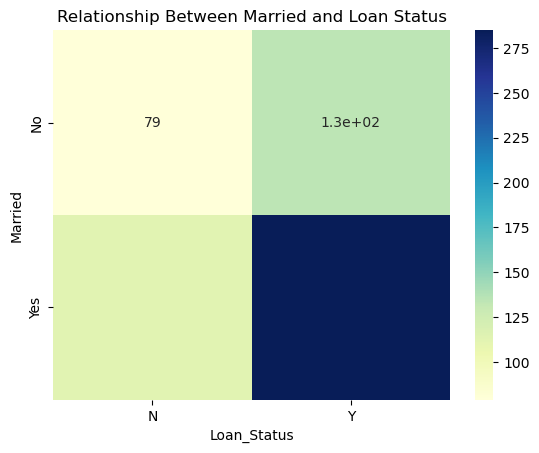

In [21]:
sns.heatmap(relation, annot=True, cmap='YlGnBu')
plt.title('Relationship Between Married and Loan Status')
plt.show()

In [22]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [23]:
df = df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [24]:
df = df[['Married', 'Dependents', 'Education', 'Self_Employed', 'Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [25]:
df

,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0.0,Graduate,No,5849.0,NaN,360.0,1.0,Urban,Y
1,Yes,1.0,Graduate,No,6091.0,128.0,360.0,1.0,Rural,N
2,Yes,0.0,Graduate,Yes,3000.0,66.0,360.0,1.0,Urban,Y
3,Yes,0.0,Not Graduate,No,4941.0,120.0,360.0,1.0,Urban,Y
4,No,0.0,Graduate,No,6000.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,No,0.0,Graduate,No,2900.0,71.0,360.0,1.0,Rural,Y
610,Yes,3.0,Graduate,No,4106.0,40.0,180.0,1.0,Rural,Y
611,Yes,1.0,Graduate,No,8312.0,253.0,360.0,1.0,Urban,Y
612,Yes,2.0,Graduate,No,7583.0,187.0,360.0,1.0,Urban,Y


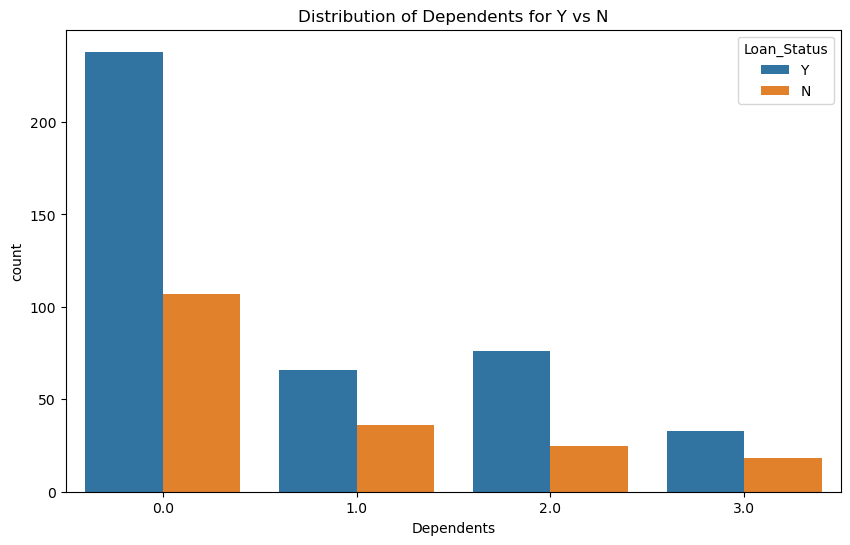

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dependents', hue='Loan_Status')  
plt.title('Distribution of Dependents for Y vs N')
plt.show()

In [27]:
df

,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0.0,Graduate,No,5849.0,NaN,360.0,1.0,Urban,Y
1,Yes,1.0,Graduate,No,6091.0,128.0,360.0,1.0,Rural,N
2,Yes,0.0,Graduate,Yes,3000.0,66.0,360.0,1.0,Urban,Y
3,Yes,0.0,Not Graduate,No,4941.0,120.0,360.0,1.0,Urban,Y
4,No,0.0,Graduate,No,6000.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,No,0.0,Graduate,No,2900.0,71.0,360.0,1.0,Rural,Y
610,Yes,3.0,Graduate,No,4106.0,40.0,180.0,1.0,Rural,Y
611,Yes,1.0,Graduate,No,8312.0,253.0,360.0,1.0,Urban,Y
612,Yes,2.0,Graduate,No,7583.0,187.0,360.0,1.0,Urban,Y


In [28]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

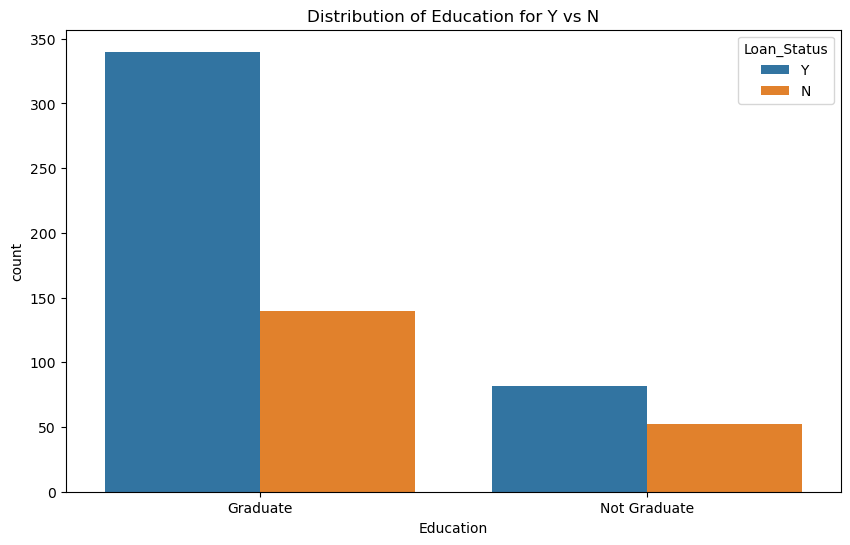

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Loan_Status')  
plt.title('Distribution of Education for Y vs N')
plt.show()

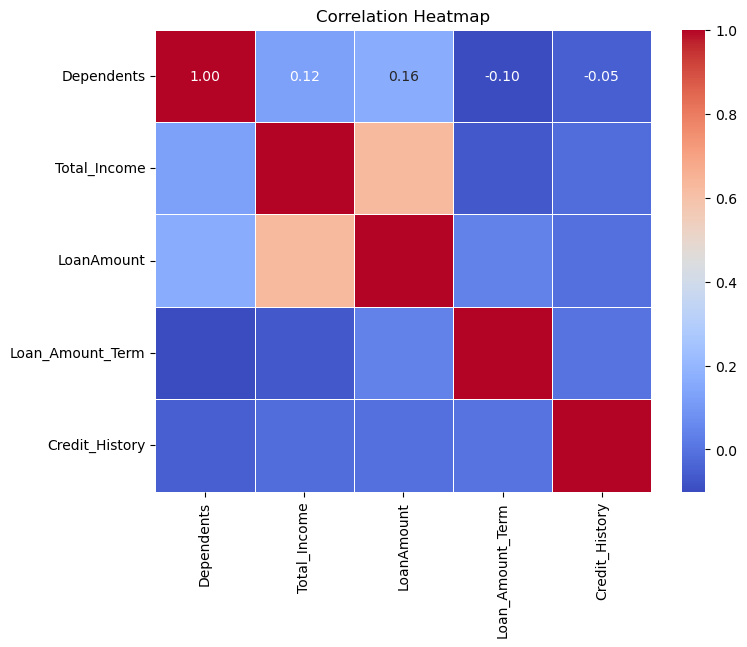

In [30]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_cols.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

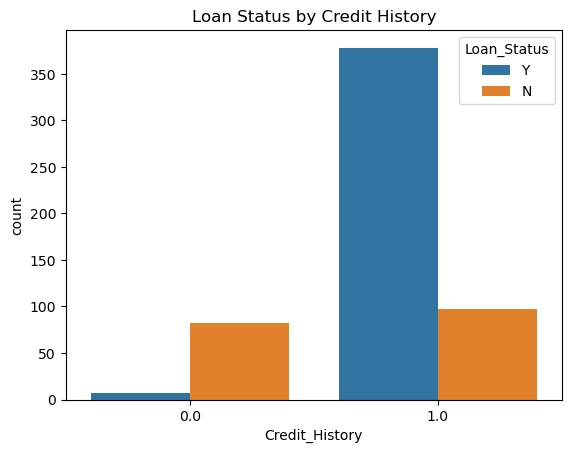

In [31]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title('Loan Status by Credit History')
plt.show()

In [32]:
df

,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0.0,Graduate,No,5849.0,NaN,360.0,1.0,Urban,Y
1,Yes,1.0,Graduate,No,6091.0,128.0,360.0,1.0,Rural,N
2,Yes,0.0,Graduate,Yes,3000.0,66.0,360.0,1.0,Urban,Y
3,Yes,0.0,Not Graduate,No,4941.0,120.0,360.0,1.0,Urban,Y
4,No,0.0,Graduate,No,6000.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,No,0.0,Graduate,No,2900.0,71.0,360.0,1.0,Rural,Y
610,Yes,3.0,Graduate,No,4106.0,40.0,180.0,1.0,Rural,Y
611,Yes,1.0,Graduate,No,8312.0,253.0,360.0,1.0,Urban,Y
612,Yes,2.0,Graduate,No,7583.0,187.0,360.0,1.0,Urban,Y


In [33]:
df = df[['Dependents','Total_Income','LoanAmount','Loan_Amount_Term','Credit_History','Married','Education','Self_Employed','Property_Area','Loan_Status']]

In [34]:
df

,Dependents,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,5849.0,NaN,360.0,1.0,No,Graduate,No,Urban,Y
1,1.0,6091.0,128.0,360.0,1.0,Yes,Graduate,No,Rural,N
2,0.0,3000.0,66.0,360.0,1.0,Yes,Graduate,Yes,Urban,Y
3,0.0,4941.0,120.0,360.0,1.0,Yes,Not Graduate,No,Urban,Y
4,0.0,6000.0,141.0,360.0,1.0,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.0,71.0,360.0,1.0,No,Graduate,No,Rural,Y
610,3.0,4106.0,40.0,180.0,1.0,Yes,Graduate,No,Rural,Y
611,1.0,8312.0,253.0,360.0,1.0,Yes,Graduate,No,Urban,Y
612,2.0,7583.0,187.0,360.0,1.0,Yes,Graduate,No,Urban,Y


In [35]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [36]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [37]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [38]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [39]:
df['Credit_History'].isna().value_counts()

Credit_History
False    614
Name: count, dtype: int64

In [40]:
df

,Dependents,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,5849.0,146.412162,360.0,1.0,No,Graduate,No,Urban,Y
1,1.0,6091.0,128.000000,360.0,1.0,Yes,Graduate,No,Rural,N
2,0.0,3000.0,66.000000,360.0,1.0,Yes,Graduate,Yes,Urban,Y
3,0.0,4941.0,120.000000,360.0,1.0,Yes,Not Graduate,No,Urban,Y
4,0.0,6000.0,141.000000,360.0,1.0,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.0,71.000000,360.0,1.0,No,Graduate,No,Rural,Y
610,3.0,4106.0,40.000000,180.0,1.0,Yes,Graduate,No,Rural,Y
611,1.0,8312.0,253.000000,360.0,1.0,Yes,Graduate,No,Urban,Y
612,2.0,7583.0,187.000000,360.0,1.0,Yes,Graduate,No,Urban,Y


In [41]:
X = df.iloc[:,0:5]
y= df.iloc[:,-1]

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [43]:
sc = StandardScaler()
X_train_s = sc.fit_transform (X_train)
X_train_s.reshape(-1,1)

X_test_s = sc.transform(X_test)

In [128]:
knn = KNeighborsClassifier(n_neighbors=15)

In [130]:
knn.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=15)

In [132]:
y_pred_knn = knn.predict(X_test_s)

In [134]:
lr = LogisticRegression()
lr.fit(X_train_s, y_train)

LogisticRegression()

In [136]:
y_pred = lr.predict(X_test_s)

In [138]:
f1 = f1_score(y_test, y_pred, pos_label='Y')
print(f"F1-Score: {f1}")

F1-Score: 0.8541666666666667


In [140]:
f1 = f1_score(y_test, y_pred_knn, pos_label='Y')
print(f"F1-Score: {f1}")

F1-Score: 0.8541666666666667


In [142]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metric to use
}


In [144]:
model = LogisticRegression(max_iter=1000)
model_knn = KNeighborsClassifier(n_neighbors = 20)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

In [146]:
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [147]:
grid_search_knn.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [149]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [158]:
print("Best Paramenter for KNN is:",grid_search_knn.best_params_)
best_model_knn = grid_search_knn.best_estimator_

Best Paramenter for KNN is: {'algorithm': 'brute', 'metric': 'chebyshev', 'n_neighbors': 15, 'weights': 'distance'}


In [160]:
y_pred = best_model.predict(X_test_s)  # Ensure to use scaled test data
f1 = f1_score(y_test, y_pred, pos_label='Y')  # Default is binary classification
print("Test F1-Score:", f1)

Test F1-Score: 0.8541666666666667


In [162]:
y_pred = best_model_knn.predict(X_test_s)  # Ensure to use scaled test data
f1 = f1_score(y_test, y_pred_knn, pos_label='Y')  # Default is binary classification
print("Test F1-Score:", f1)

Test F1-Score: 0.8541666666666667
